In [1]:
import cv2


In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000191FAB89BA0>

In [9]:
img = cv2.imread('ing.jpg')

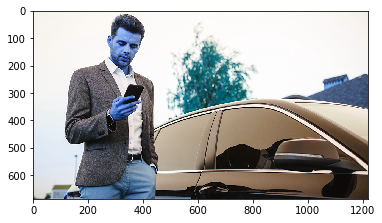

In [10]:
plt.imshow(img)

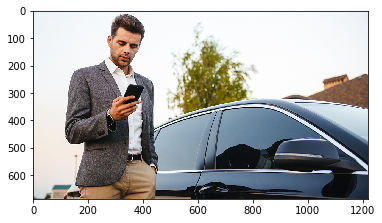

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
classIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [13]:
print(classIndex)

[[1]
 [3]]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_pffset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img,boxes,(255, 0, 0), 2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

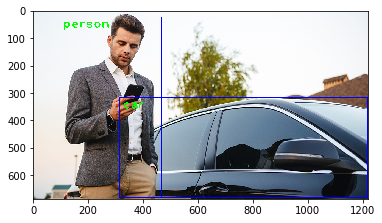

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
"""cap = cv2.VideoCapture("4K camera example for Traffic Monitoring.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(classIndex)
    if (len(classIndex)!=0):
        for ClassInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)
    
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
"""

'cap = cv2.VideoCapture("4K camera example for Traffic Monitoring.mp4")\n\nif not cap.isOpened():\n    cap = cv2.VideoCapture(0)\nif not cap.isOpened():\n    raise IOError("Cannot open video")\n    \nfont_scale = 3\nfont = cv2.FONT_HERSHEY_PLAIN\n\nwhile True:\n    ret,frame = cap.read()\n    \n    classIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)\n    \n    print(classIndex)\n    if (len(classIndex)!=0):\n        for ClassInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):\n            if (ClassInd<=80):\n                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )\n                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)\n    \n    cv2.imshow(\'Object Detection\',frame)\n    \n    if cv2.waitKey(2) & 0xFF == ord(\'q\'):\n        break\n        \ncap.release()\ncv2.destroyAllWindows()\n'

In [17]:
cap = cv2.VideoCapture("1")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(classIndex)
    if (len(classIndex)!=0):
        for ClassInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)
    
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [75]]
[[1]]
[[1]]
[[ 1]
 [75]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [90]
 [90]]
[[ 1]
 [77]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [44]
 [90]]
[[ 1]
 [44]
 [90]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [44]
 [90]]
[[ 1]
 [44]
 [90]
 [90]]
[[ 1]
 [44]
 [90]]
[